# **Nhiệm vụ 3 – GroupBy & Tổng hợp**

*Mục tiêu : phân nhóm dữ liệu và rút ra các đặc trưng quan trọng*

In [38]:
# !pip install matplotlib

In [39]:
# import libary
import pandas as pd

# Read csv
df_teams = pd.read_csv(f'./data_clean/team_info_clean.csv')
df_players = pd.read_csv(f'./data_clean/player_stats_clean.csv')
df_matches = pd.read_csv(f'./data_clean/match_results_clean.csv', parse_dates=['match_date'])

**1. Tổng số bàn thắng theo từng cầu thủ**

In [40]:
team_goals_summary = (
    df_players.groupby(['player_id', 'player_name', 'team_id'])
        .agg(total_goals=('goals', 'sum'))``
        .reset_index()
        .sort_values('total_goals', ascending=False)
)

team_goals_summary.head(20)

,player_id,player_name,team_id,total_goals
8,P009,Hoang Duc,T01,7
11,P012,Nguyen Van A,T01,7
27,P028,Le Cong Vinh,T03,7
63,P064,Hoang Duc,T06,7
55,P056,Pham Thanh Luan,T05,7
51,P052,Nguyen Van A,T05,7
57,P058,Le Cong Vinh,T06,7
34,P035,Hoang Duc,T04,7
33,P034,Tran Van B,T03,7
30,P031,Pham Thanh Luan,T03,7


**2. Tổng số bàn thắng theo từng đội bóng**

In [41]:
team_goals_summary = (
    df_players.groupby('team_id')
           .agg(total_goals=('goals', 'sum'))
           .reset_index()
           .merge(df_teams[['team_id', 'team_name']], on='team_id', how='left')
           .sort_values('total_goals', ascending=False)
).head(4)
print("Tổng Số Bàn Thắng Theo Đội Bóng (Dựa trên Thống kê Cầu thủ)")
team_goals_summary

Tổng Số Bàn Thắng Theo Đội Bóng (Dựa trên Thống kê Cầu thủ)


,team_id,total_goals,team_name
2,T03,42,Clb Ha Noi
3,T04,40,Clb Hai Phong
6,T07,37,Clb Binh Duong
0,T01,33,Clb Thanh Pho Hcm


**3. Tổng và trung bình bàn thắng ghi được trong các trận đấu (home_goals + 
away_goals)**

In [42]:
# Tính tổng số bàn thắng trong mỗi trận
df_matches['total_goals_match'] = df_matches['home_goals'] + df_matches['away_goals']

total_goals_league = df_matches['total_goals_match'].sum()
average_goals_per_match = df_matches['total_goals_match'].mean()
total_matches = len(df_matches)

print("Thống Kê Bàn Thắng Toàn Giải Đấu ")
print(f"Tổng số trận đấu: {total_matches}")
print(f"⚽ Tổng số bàn thắng ghi được (Toàn Giải): {total_goals_league}")
print(f"📊 Số bàn thắng trung bình mỗi trận: {average_goals_per_match:.2f} bàn/trận")

Thống Kê Bàn Thắng Toàn Giải Đấu 
Tổng số trận đấu: 60
⚽ Tổng số bàn thắng ghi được (Toàn Giải): 244
📊 Số bàn thắng trung bình mỗi trận: 4.07 bàn/trận


**4. Thống kê số bàn thắng trung bình theo Đội × Vị trí cầu thủ (team_id × position)**

In [43]:
avg_goals = (
    df_players.groupby(['team_id', 'position'])
        .agg(
            tong_ban=('goals', 'sum'),
            so_cau_thu=('player_id', 'nunique')
        )
        .reset_index()
)

# Tính trung bình bàn thắng theo vị trí
avg_goals['ban_tb_moi_cau_thu'] = avg_goals['tong_ban'] / avg_goals['so_cau_thu']

avg_goals = avg_goals.merge(
    df_teams[['team_id', 'team_name']],
    on='team_id',
    how='left'
)

# Làm tròn 2 chữ số
avg_goals = avg_goals.round(2)

print("Trung bình Bàn Thắng Theo Đội x Vị trí Cầu thủ ")
avg_goals

Trung bình Bàn Thắng Theo Đội x Vị trí Cầu thủ 


,team_id,position,tong_ban,so_cau_thu,ban_tb_moi_cau_thu,team_name
0,T01,DF,11,5,2.20,Clb Thanh Pho Hcm
1,T01,FW,4,2,2.00,Clb Thanh Pho Hcm
2,T01,GK,17,5,3.40,Clb Thanh Pho Hcm
3,T01,MF,1,2,0.50,Clb Thanh Pho Hcm
4,T02,DF,8,3,2.67,Clb Hai Phong
5,T02,FW,9,3,3.00,Clb Hai Phong
6,T02,GK,3,1,3.00,Clb Hai Phong
7,T02,MF,5,2,2.50,Clb Hai Phong
8,T03,DF,4,1,4.00,Clb Ha Noi
9,T03,FW,18,4,4.50,Clb Ha Noi


**5. Các đội bóng có hiệu suất ghi bàn cao nhất**

Các Đội bóng có Hiệu suất Ghi bàn Cao nhất
           team_name  total_goals
2         Clb Ha Noi           42
3      Clb Hai Phong           40
6     Clb Binh Duong           37
0  Clb Thanh Pho Hcm           33


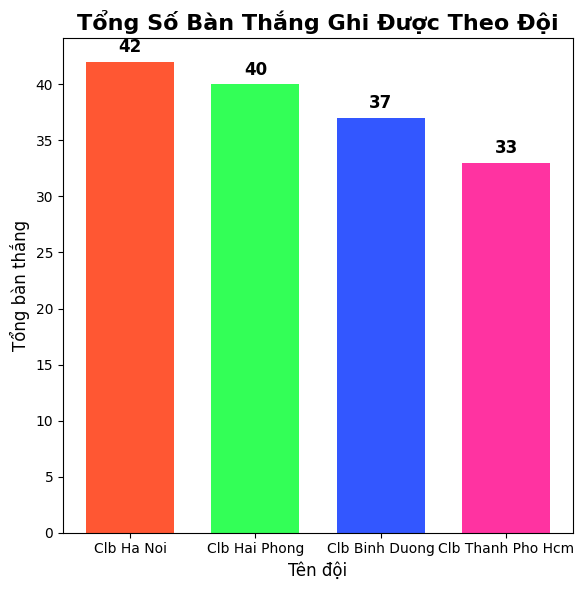

In [44]:
top_scoring_teams = team_goals_summary.head(4)

print("Các Đội bóng có Hiệu suất Ghi bàn Cao nhất")
print(top_scoring_teams[['team_name', 'total_goals']])

# Trực quan hóa Hiệu suất Ghi bàn
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
bars = plt.bar(
    top_scoring_teams['team_name'],
    top_scoring_teams['total_goals'],
    color=['#FF5733', '#33FF57', '#3357FF', '#FF33A1'],
    width=0.7
)

plt.title('Tổng Số Bàn Thắng Ghi Được Theo Đội', fontsize=16, fontweight='bold')
plt.xlabel('Tên đội', fontsize=12)
plt.ylabel('Tổng bàn thắng', fontsize=12)

# Thêm giá trị lên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., height + 0.5,
        f'{int(height)}', 
        ha='center', va='bottom', fontweight='bold', fontsize=12
    )

plt.tight_layout()  # Tránh bị cắt chữ
plt.show()